## Introduction



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('tmdb-movies.csv')
df.style.set_properties(**{'text-align': 'left'})
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Posing questions:


 Our analysis will try to find an answer for the following questions:
1. If any movie primary goal is to achieve higher popularity, is money then a critical part of it?
2. Who are the most sucsseful directors, for sucsess we don't have a predefined definition, we will see what our dataset will bring to us.
3. Who are the most sucsseful actors, since it's highly expected that an expert and popular ones will be used in the high budget movies, we will take a look on those who are most sucsseful because of the film popularity.

## Data Wrangling





### General Properties

Taking a look at the database

In [2]:
df.shape

(10866, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

df.describe() will be skipped, we aren't in need for the it's information now.

For now, we will take a look on homepage column, as it shows an extraordinary number of missing values.

In [4]:
df.homepage

0                            http://www.jurassicworld.com/
1                              http://www.madmaxmovie.com/
2           http://www.thedivergentseries.movie/#insurgent
3        http://www.starwars.com/films/star-wars-episod...
4                                 http://www.furious7.com/
                               ...                        
10861                                                  NaN
10862                                                  NaN
10863                                                  NaN
10864                                                  NaN
10865                                                  NaN
Name: homepage, Length: 10866, dtype: object

Looks like homepage column is for the web site for every film, that's why there's alot of missing values, also as it's doesn't mean any important for our analysis, we will drop it later.


In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


A first look tells us that we need to get rid of many columns, but we are fortunate to have columns like cast and genres have information separated by a character - i.e. | - that will help us in getting data easier then.

Since our analysis will rely on genres, we need to seperate them so as to get more acsessable, that what we will do before jumping in duplicates. 

In [6]:
#df.set_index(keys =  "id", inplace= True)
genres_df = df['genres'].str.split("|", expand=True)
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df)
genres_df.rename(columns={0: "genres_adj"}, inplace = True)
genres_df.head()

genres_adj
0 0           Action
  1        Adventure
  2  Science Fiction
  3         Thriller
1 0           Action

We got a seperated column for dealing with genres, id of course will be the connection key here.

### Dealing with duplicates.

In [7]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

Sorry but i'm so curious to know what is the duplicated column.

In [8]:
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Now i know what is it - kinda strange to be specifically tekken - i will drop it.

In [9]:
df.drop_duplicates(inplace=True)

### Searching for nan values and cleaning them.

In [10]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

For homepage why there are alot of nan values there, to deal with it, we will delete the whole column, because we aren't in need for it.


In [11]:
df.drop(columns="homepage", inplace= True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


We will take alook at the another nan containing values.

In [12]:
nan_containing = df.isna().sum()
nan_containing = nan_containing[nan_containing != 0]
nan_containing

imdb_id                   10
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

imdb_id column will be deleted, as we have another id.

In [13]:
df.drop(columns="imdb_id", inplace= True)

In [14]:
df.tagline

0                                        The park is open.
1                                       What a Lovely Day.
2                               One Choice Can Destroy You
3                            Every generation has a story.
4                                      Vengeance Hits Home
                               ...                        
10861                                                  NaN
10862    Cinerama sweeps YOU into a drama of speed and ...
10863                                                  NaN
10864                            WOODY ALLEN STRIKES BACK!
10865         It's Shocking! It's Beyond Your Imagination!
Name: tagline, Length: 10865, dtype: object

tagline column will be deleted, it won't be of benefit for our analysis.

In [15]:
df.drop(columns="tagline", inplace= True)

In [16]:
df.overview

0        Twenty-two years after the events of Jurassic ...
1        An apocalyptic story set in the furthest reach...
2        Beatrice Prior must confront her inner demons ...
3        Thirty years after defeating the Galactic Empi...
4        Deckard Shaw seeks revenge against Dominic Tor...
                               ...                        
10861    The Endless Summer, by Bruce Brown, is one of ...
10862    Grand Prix driver Pete Aron is fired by his te...
10863    An insurance agent who moonlights as a carthie...
10864    In comic Woody Allen's film debut, he took the...
10865    A family gets lost on the road and stumbles up...
Name: overview, Length: 10865, dtype: object

For the same reason as tagline, overview column will be deleted.

In [17]:
df.drop(columns="overview", inplace=True)

In [18]:
nan_containing = df.isna().sum()
nan_containing = nan_containing[nan_containing != 0]
nan_containing

cast                      76
director                  44
keywords                1493
genres                    23
production_companies    1030
dtype: int64

In [19]:
df[df.cast.isna() == True]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,NaN,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,NaN,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,manipulation|politics|war|control|fear,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,mustang|car|corporation|henry ford family|car ...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,0.253376,0,0,Red's Dream,NaN,John Lasseter,NaN,4,Animation,Pixar Animation Studios,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,NaN,6,Drama,NaN,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,student movie|short,4,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,pixar animated short|luxo lamps|beach ball|fat...,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986,0.000000,0.0


Apparently, there are alot of cast rows with nan values that have a nan in keywords, also have a zeros in budjet columns, which means they will be unuseful in our analysis, we will make a more detailed search, a row that has nan in cast and keywords with a zero in budget columns will be dropped.

In [20]:
df.query("cast.isna() == True & keywords.isna() == True & budget == 0").head()


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,NaN,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.0,0.000000e+00
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,NaN,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.0,0.000000e+00
587,319091,0.062536,0,0,The Hunting Ground,NaN,Kirby Dick,NaN,103,Documentary,NaN,2/27/15,39,7.8,2015,0.0,0.000000e+00
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.000000e+00
1088,169607,0.226028,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,NaN,83,Documentary,NaN,3/28/14,70,7.8,2014,0.0,1.384967e+06


We decided to delete rows with nan in cast and keywords with a zero in budget columns, however they still have their genres defined with an average rating, this will help us in making our sample bigger, it will be a part of our analysis, we will deal with it carefully so later we can drop those columns when we are no longer in need for it, However an another final search will be done, this time we will be looking for a rows with a an empty genres. This is because genres - or keywords - will be a crucial part in  our advanced analysis later. 

In [21]:
df.query("cast.isna() == True & keywords.isna() == True & budget == 0 & genres.isna() == True")


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0


A no brainer drop here.

In [22]:
to_be_dropped = df.query("cast.isna() == True & keywords.isna() == True & budget == 0 & genres.isna() == True").index
df.drop(to_be_dropped[0], inplace= True)
df.query("cast.isna() == True & keywords.isna() == True & budget == 0 & genres.isna() == True")

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [23]:
df.query("cast.isna() == True & keywords.isna() == True & budget == 0 & genres.isna() == True")

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### A final look, deciding which columns will be dropped.

In [24]:
pd.options.display.max_rows = None
df.head()


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I think we won't be deleting any columns here, but there some notes:
1. keywords and genres columns seems to have the same meaning or benefit, however genres are the officially decided, keywords are words that people search for, for our analysis, both keywords and genres will provide a diffrenet meanings and insights, as we will se later.
2. for budget and budget_adj, the official document says that both budgets and revenues shouldn't be adjusted for inflation, however a comparison between a 20 million dollar film in 1954 and another film with the same budget in 2018 will be unfair, and as we will make some historical comprasions, i prefer to keep the adj columns, the original one will be kept also in case of something happened.
3. director and cast columns are pretty important, they will be shown in a graphs comparing the most sucsseful of them, so they will be kept.
4. vote count and vote average vs popularity: a first look may give the impression that they are the same information with different shape, however the official documentaion stats that popularity for movies is based on a collection of stats (https://developers.themoviedb.org/3/getting-started/popularity), average and count vote gives a different meaning in another context, and who knows? maybe we will be using them to make some nice comprasions!
5. finally, id number will be assurance in identfying movies more preciesly.


## Exploratory Data Analysis

### A first look:

In [25]:
# popularity_sep where sep stands for separated.
pd.set_option('display.float_format', lambda x: '%.5f' % x)
popularity_sep = df.popularity.sort_values(ascending= False)
pop_slice = popularity_sep.describe()[3:].tolist()
df_copy = df.copy()
pop_names = ["low", "average", "above average", "very popular"]
df_copy["popularity"] = pd.cut(df["popularity"], pop_slice, labels= pop_names)
df_copy.groupby("popularity").mean(numeric_only = True)


,id,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,,,,,,,,,
low,87550.67624,2059741.07330,2637178.66041,97.33370,26.92560,5.90114,2000.87330,2948067.62423,4501842.58518
average,65331.16348,4794100.39323,5202415.44477,99.79013,37.92526,5.80747,2000.42010,6542513.46855,8923386.99109
above average,54970.52283,10695976.40464,17808477.91532,102.60898,91.83800,5.91042,2000.76730,13847691.22958,26521456.79262
very popular,56329.86745,40953469.25331,133675147.07143,108.38807,712.98859,6.28133,2003.22754,46868850.94093,165549891.66956


For starting i thought calssifying popularity on 4 quartiles as low, average, above average and very popular would give us some insights to help us standardize our definiton for succed, a look on vote count metric would make sense why it's flawed, it's simply because high popular films have more chances of being rated, but let's not rush it out, let's look for the median.

In [26]:
df_copy.groupby("popularity").median(numeric_only = True)

,id,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,,,,,,,,,
low,34482.00000,0.00000,0.00000,94.00000,15.00000,6.00000,2006.00000,0.00000,0.00000
average,22257.50000,0.00000,0.00000,97.00000,24.00000,5.90000,2005.00000,0.00000,0.00000
above average,14176.00000,334000.00000,0.00000,99.00000,56.00000,5.90000,2005.00000,477004.75256,0.00000
very popular,11384.50000,25000000.00000,66884182.00000,105.00000,367.00000,6.30000,2006.00000,31379414.80144,81727850.62488


Films in category low and average are more prone to the problem of not having enough information about them, most of budget and revenue columns don't have any information, that's means more errors, we can look at the vote average in low which is better than average and above average and very close to very popular, that doesn't mean by anyways that all of the less popular films are good, we can have a more biases because of less sample size, but this isn't even the real problem, the real problem here, is that very popular has relative big sample compared to low, that's makes our conclusions less accurate, but again, let's take a look on this

In [27]:
sample_check = df_copy.query("budget != 0 & revenue != 0")
sample_check.popularity.value_counts()


very popular     2148
above average     990
average           480
low               236
Name: popularity, dtype: int64

It's proved, very popular size are more than 10 times bigger than low, 4 times than average, and being not fully known with statsics, i'm not confident in my ability of standarizing both samples size, a category-based analysis would have more meaning here, i.e. investigating very popular on it's own, but one more time, let's take a look on the count of votes and their sizes, may it provide something.

In [28]:
df_copy.groupby("popularity")["vote_average"].describe()


,count,mean,std,min,25%,50%,75%,max
popularity,,,,,,,,
low,2715.00000,5.90114,1.05973,1.50000,5.25000,6.00000,6.60000,9.20000
average,2716.00000,5.80747,0.96032,2.30000,5.20000,5.90000,6.50000,8.80000
above average,2716.00000,5.91042,0.83477,2.40000,5.40000,5.90000,6.50000,8.30000
very popular,2716.00000,6.28133,0.79096,3.30000,5.80000,6.30000,6.80000,8.40000


A std of nearly 1 for low popularity with a 25% percentile close to others mean that that biases aren't that relavent here, also, very popular films have a much more closer ratings starting with the best min of all the categories and endining with the second worst max of all of them, let's take a look at the exact number of vote count for each category.

In [29]:
df_copy.groupby("popularity")["vote_count"].describe()



,count,mean,std,min,25%,50%,75%,max
popularity,,,,,,,,
low,2715.00000,26.92560,118.10739,10.00000,12.00000,15.00000,23.00000,3651.00000
average,2716.00000,37.92526,56.72075,10.00000,15.00000,24.00000,43.00000,1655.00000
above average,2716.00000,91.83800,156.07598,10.00000,28.00000,56.00000,111.00000,4368.00000
very popular,2716.00000,712.98859,976.94939,10.00000,174.00000,367.00000,810.00000,9767.00000


Wow! a films of low popularity have an average of 26 rating for each, meanwhile a high popular film has nearly 26 times that number. Again this make the assumption that comparing different categories to each other isn't a right thing to do.

### Research Question 1: Who are the most sucsseful directors?

Our definition of sucsses will be the popularity of a film, net revenue comes next.

In [30]:
most_pop = df.sort_values(by= "popularity", ascending= False, ignore_index= True)[:100]
most_pop.describe()["popularity"]

count   100.00000
mean      7.46447
std       4.29497
min       4.83197
25%       5.54827
50%       6.10540
75%       7.97478
max      32.98576
Name: popularity, dtype: float64

In [31]:
most_pop.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,157336,24.94913,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.00000,2014,151980023.37729,572690645.12296
3,118340,14.31120,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.90000,2014,156585478.63115,712291130.16951
4,262500,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763


Average is 7 in most 100 popular films, with only 3 films that have a huge difference to it's closet film, now let's see the directors who are involved the most.

In [32]:
most_pop["director"].value_counts()

Quentin Tarantino                 5
Christopher Nolan                 5
Peter Jackson                     4
David Yates                       4
Chris Columbus                    3
Francis Lawrence                  3
Len Wiseman                       2
Sam Mendes                        2
Gore Verbinski                    2
Robert Zemeckis                   2
Ridley Scott                      2
James Cameron                     2
Joss Whedon                       2
Alfonso CuarÃ³n                   2
David Fincher                     2
Jon Favreau                       2
Alan Taylor                       2
Alejandro GonzÃ¡lez IÃ±Ã¡rritu    2
Colin Trevorrow                   1
Jake Kasdan                       1
Peyton Reed                       1
Francis Ford Coppola              1
Olivier Megaton                   1
Jonathan Liebesman                1
Patrick Tatopoulos                1
Andrew Stanton                    1
Irvin Kershner                    1
Tim Burton                  

Both quentin tarantino and cristopher nolan are doing a good job here, data proves what's known, but being 5 times in the most popular films doesn't always mean that you're so good, you can be 5 times there starting from the last, so we are going to separate our data to 10 parts, and giving each part a factor of importance, first one will be 1, second one will be .9 and so on, let's see what we can do.

In [47]:

def factorise_data(data):
    """
    Takes the data to be factroised and factroise it.
    Since we only need to factorise our data only two times, this function doesn't have high reusability, It's very specified.
    """
    data_to_be_factorised = pd.DataFrame(data=data)
    data_to_be_factorised.insert(1, "value", 0)
    data_to_be_factorised_sliced = np.split(data_to_be_factorised, 10)
    
    v = 1
    for n in range(0, 10):
        data_to_be_factorised_sliced[n]["value"] = v
        v -= 0.1
    data_to_be_factorised = pd.concat(data_to_be_factorised_sliced)
    
    values = {}
    
    for x in data_to_be_factorised.director:
        if x not in values:
            values[x] = data_to_be_factorised[data_to_be_factorised.director == x].value.tolist()
    
    for x, y in values.items():
        values[x] = sum(y)
    final_values = pd.DataFrame(data= values.items(), index = values.keys())
    final_values.drop(columns= 0, inplace= True)
    
    return final_values



In [48]:
directors_factorised = factorise_data(most_pop["director"])
directors_factorised.rename(columns={1:"popularity"}, inplace=True)
directors_factorised.index.name = "director"
directors_factorised.sort_values(by= "popularity",ascending=False).head(10)


,popularity
director,
Christopher Nolan,3.80000
Peter Jackson,3.30000
Quentin Tarantino,2.80000
Chris Columbus,1.80000
Alejandro GonzÃ¡lez IÃ±Ã¡rritu,1.60000
David Fincher,1.50000
Francis Lawrence,1.40000
Joss Whedon,1.30000
Robert Zemeckis,1.20000


Compared to the original sorting below, nolan has more value in his apperances, and even of his four time apperance david yates dropped out of the best 10, now we can make reach a strong result about who are the best directors of all time.

In [35]:
most_pop["director"].value_counts().head(10)

Quentin Tarantino    5
Christopher Nolan    5
Peter Jackson        4
David Yates          4
Chris Columbus       3
Francis Lawrence     3
Len Wiseman          2
Sam Mendes           2
Gore Verbinski       2
Robert Zemeckis      2
Name: director, dtype: int64

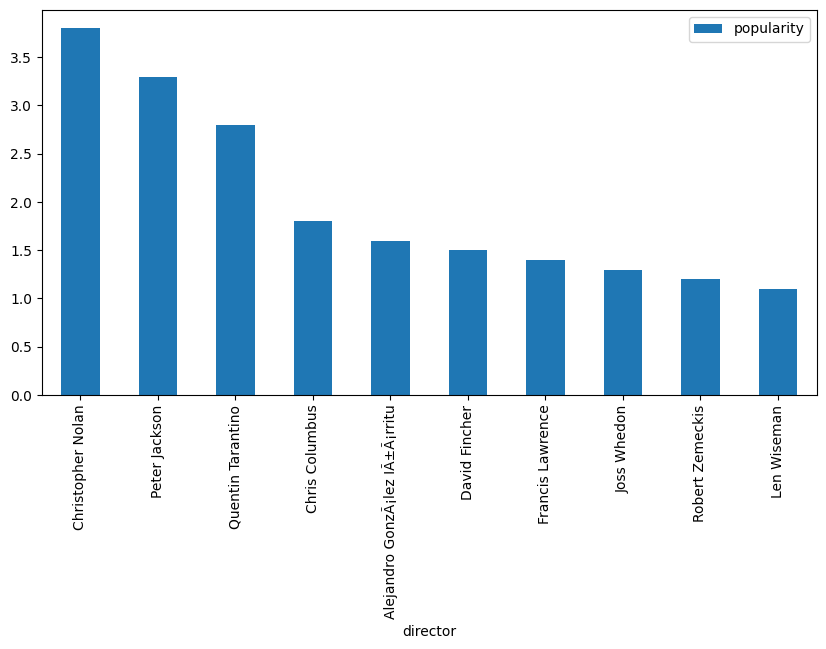

In [49]:
directors_factorised.sort_values(by= "popularity",ascending=False)[:10].plot(kind="bar");

Let's define the second metric, net revenue for each director.

In [37]:
df.sort_values(by="revenue", ascending= False)[:100].director.value_counts()

Peter Jackson                                6
George Lucas                                 4
David Yates                                  4
Christopher Nolan                            4
Francis Lawrence                             3
Michael Bay                                  3
Sam Raimi                                    3
Gore Verbinski                               3
Steven Spielberg                             3
Chris Columbus                               2
Justin Lin                                   2
Alfonso CuarÃ³n                              2
Roland Emmerich                              2
Bill Condon                                  2
Brad Bird                                    2
Carlos Saldanha                              2
James Cameron                                2
Marc Webb                                    2
Joss Whedon                                  2
Sam Mendes                                   2
Barry Sonnenfeld                             1
Bryan Singer 

What about the old films? they probably gained a lesser amount of money if we are judging by it's power today, let's see what adjusted columns can tell us.

In [38]:
df.sort_values(by="revenue_adj", ascending= False)[:100].director.value_counts()

Steven Spielberg                                     7
Peter Jackson                                        6
George Lucas                                         4
Michael Bay                                          4
David Yates                                          4
James Cameron                                        3
Sam Raimi                                            3
Christopher Nolan                                    3
Chris Columbus                                       3
Gore Verbinski                                       3
Guy Hamilton                                         2
Joss Whedon                                          2
Robert Zemeckis                                      2
Roland Emmerich                                      2
Tim Burton                                           2
Sam Mendes                                           2
Garry Marshall                                       1
Andrew Adamson                                       1
Lilly Wach

Now there is a difference, spielberg who has 3 apperance in the highest 1oo, now he gained another three, also chirs colmbus who gaind another two, now if we would do our analysis, i would prefer to choose the adjusted-based one, it doesn't only shows a difference for contemporary directors but also granted apperance for others who won't be able to show here because of the value of money then, so we will continue our analysis on this.

And again, apperances will be standardised by ranking as we did with popularity metric.

In [39]:
most_revenue = df.sort_values(by="revenue_adj", ascending= False, ignore_index= True)[:100]


In [50]:
directors_revenue_factorised = factorise_data(most_revenue["director"])
directors_revenue_factorised.rename(columns={1:"revenue"}, inplace=True)
directors_revenue_factorised.index.name = "director"
directors_revenue_factorised.sort_values(by= "revenue",ascending=False).head(10)

,revenue
director,
Steven Spielberg,4.90000
Peter Jackson,3.90000
George Lucas,2.50000
David Yates,2.50000
James Cameron,2.30000
Joss Whedon,1.90000
Chris Columbus,1.80000
Christopher Nolan,1.60000
Gore Verbinski,1.60000


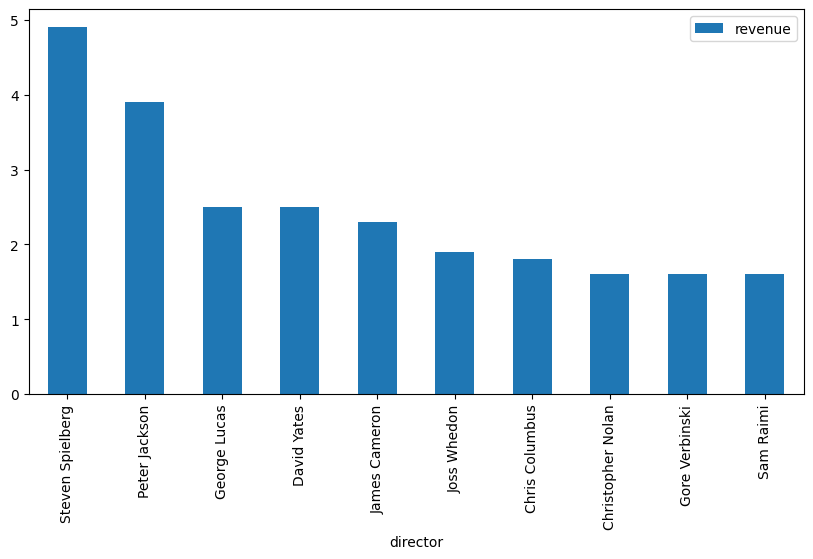

In [52]:
directors_revenue_factorised.sort_values(by= "revenue",ascending=False)[:10].plot(kind="bar");

What if we made a visualised comprasion between succeeding from the finicial perspective and popularity?
To do this, we first need to join the databases, we will make popularity the base database.

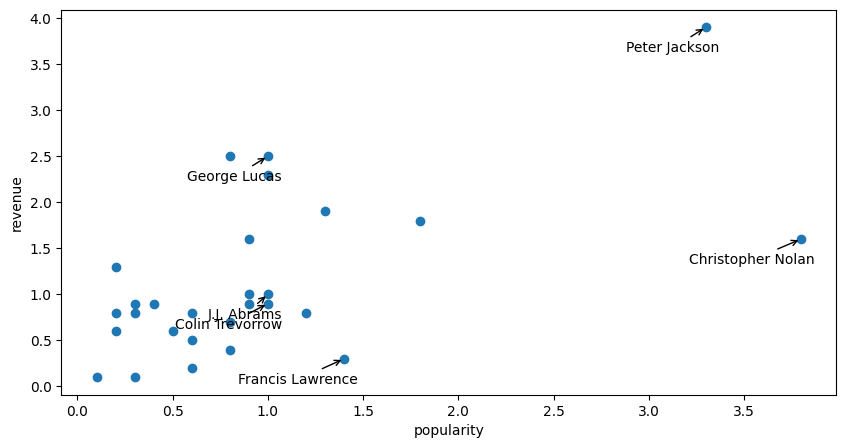

In [53]:
tst = pd.merge(directors_factorised, directors_revenue_factorised, how= "left", on="director")
tst.dropna(inplace=True)
tst = np.round(tst, decimals= 1)
plt.scatter(tst["popularity"], tst["revenue"])
plt.xlabel("popularity")
plt.ylabel("revenue")
plt.rcParams["figure.figsize"] = (10,5)
for label, x, y in zip(tst.index.tolist()[:6], tst["popularity"], tst['revenue']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(10, -20),
        textcoords='offset points', ha='right', va='bottom',alpha=1, annotation_clip=True,
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()


## Research question 2: Most Popular Cast members in Highest Grossing Movies.

It would be really good to take a look on this, on the popular actors in the most high budget films, normally, when a huge costing film is made the elitist of the actors are chosen because the director won't probably want to try with all of this money spent with a younge or unknown actor, that's why looking on this basis may help us understanding who are the most popular in hollywood itself.

Text(0.5, 1.0, 'Most Frequent Cast Members in 100 Highest Costing Movies')

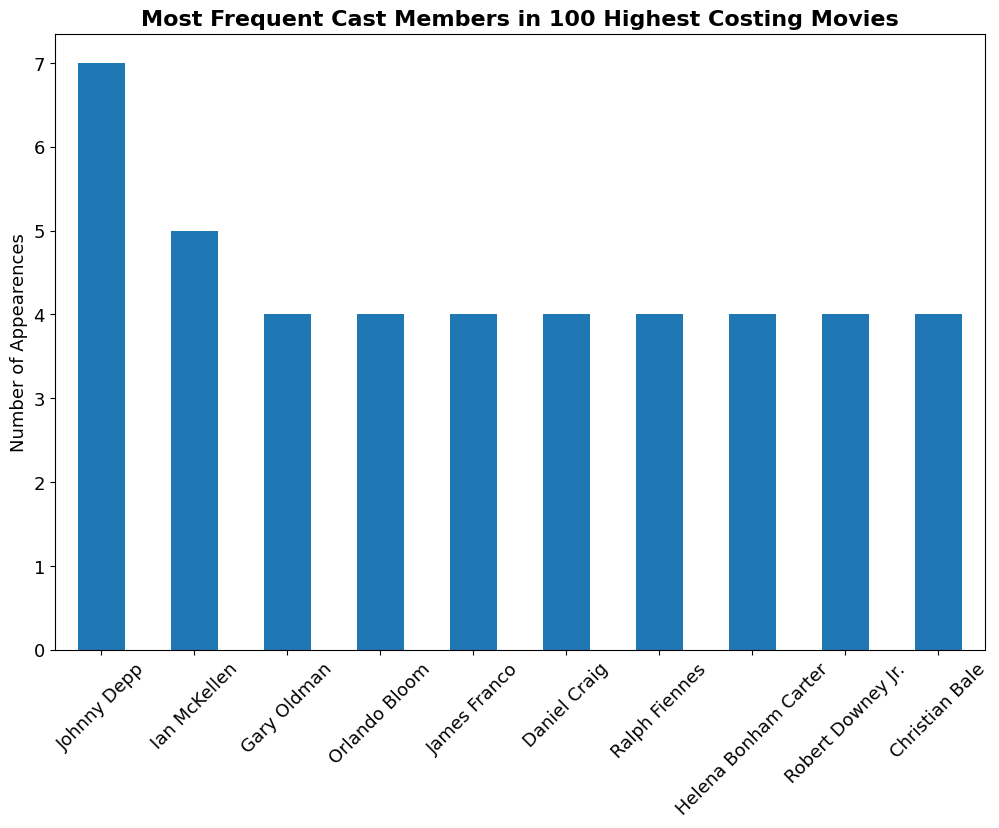

In [44]:
top_100_df = df.sort_values(by='budget_adj', ascending=False).head(100)
top_100_cast = pd.Series(top_100_df['cast'].str.cat(sep='|').split('|'))
frequent_cast_in_top_100 = top_100_cast.value_counts(ascending=False).head(10)
frequent_cast_in_top_100.plot(kind='bar', figsize=(12, 8));
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.ylabel("Number of Appearences", fontsize = 13) #add a title for the y-axis
plt.title("Most Frequent Cast Members in 100 Highest Costing Movies", fontsize = 16, fontweight = "bold")

It's kinda obvious why every one of those actors are in the list, johnny depp for his apperance in Pirates of the Caribbean, ian mckellen and the hobits, gary oldman in dark knight and harry potter, let's make more context for this by comparing it to another visual based on the popularity.

Text(0.5, 1.0, 'Most Frequent Cast Members in 100 Top Popular Movies')

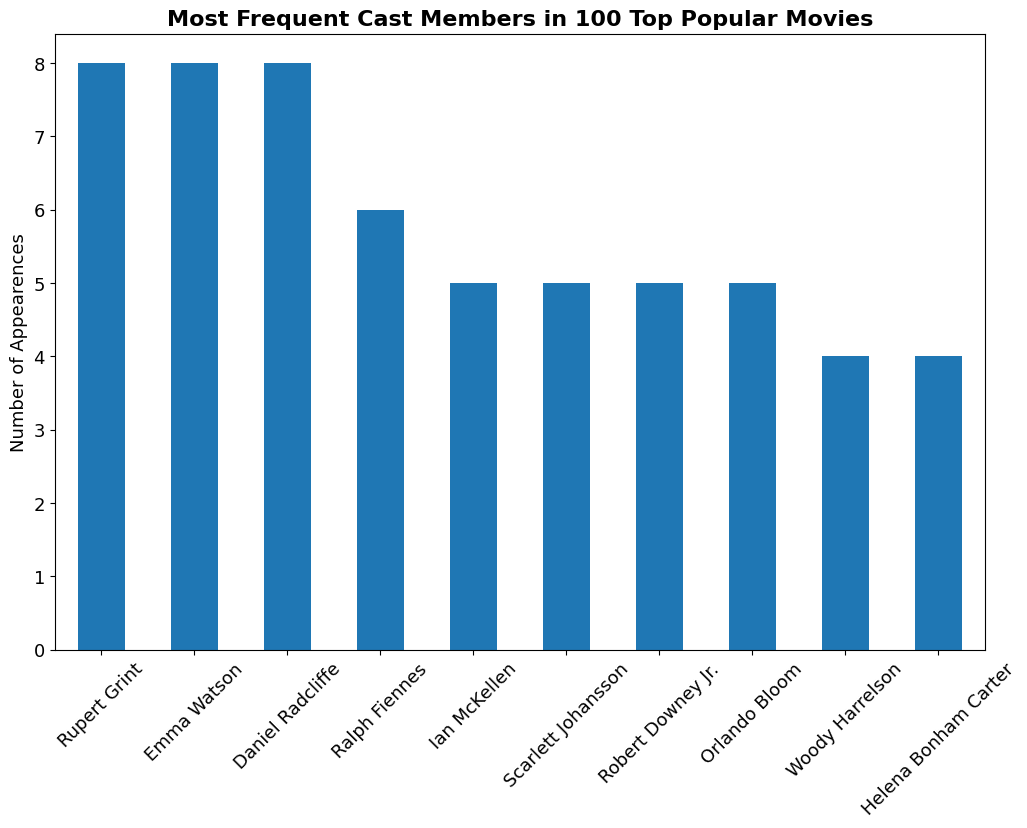

In [45]:
top_100_df = df.sort_values(by='popularity', ascending=False).head(100)
top_100_cast = pd.Series(top_100_df['cast'].str.cat(sep='|').split('|'))
frequent_cast_in_top_100 = top_100_cast.value_counts(ascending=False).head(10)
frequent_cast_in_top_100.plot(kind='bar', figsize=(12, 8));
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.ylabel("Number of Appearences", fontsize = 13) #add a title for the y-axis
plt.title("Most Frequent Cast Members in 100 Top Popular Movies", fontsize = 16, fontweight = "bold")

Of the top 10 the top 4 acted in harry potter, wow! 

In [46]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052


<a id='conclusions'></a>
## Conclusions


### 1. Data Limitations

Although our dataset contains more than 10,000 rows it's pretty insufficient to draw precise conclusions :
1. Even though i wanted to make use of the keywords later in analysis, i actually find it of less importance or meaning, even if we compared it to genres, it's not enough to draw any solid conclusion alone.
2. The same goes with another columns like runtime, it looks that you would use it to answer a question like "are the most popular film short or more longer?" but again, we shouldn't draw a conclusion on this because the context is missing, you can't reduce all of the film in a words like genres or who are the actors, a film would be more interesting because of it's drama or scenario or it's even complicated and that long time is justified, making a conclusions on a fairly complicated production like a film isn't an easy thing to do.
3. You can think of an information like who are the most sucsseful studios or the most grossing genres, but an information like this isn't of a high importance, it wouldn't really be easy to communicate your results because they aren't simply interesting.
4. Our factorized values would be better if we added more factors in it.
And finally, an interest graph over the runtime of show  with tags for the most prominant moments would've helped so much, it would give us a really strong basis to build a fair conclusions, that's actually how streaming services like netflix and HBO are analysing their products.

### 2. Conclusive Insights from our Analysis 

1. It's not always that having more grossing films means a more popular one, there things to consider which are related to artistic work.
2. Even though of the above insight, you always need a fair amount of money to have a higher probabilty of making a good film, therefore achieving more sucsess.
3. Peter jackson is one of the most sucsseful directors that succeeded in making a popular and at the same time high grossing films.
4. It looks like a more exprienced and well known actors have a higher chance of showing in high budget films, it's also self-explanatory, because well known actors will cost higher amount of money. 